<a href="https://colab.research.google.com/github/sriya26/MRM-Taskphase/blob/main/PCA_and_KMeans_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
path = '/content/drive/MyDrive/Datasets/Country-data.csv'

df = pd.read_csv(path)

In [4]:
df.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200
5,Argentina,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300
6,Armenia,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900
9,Azerbaijan,39.2,54.3,5.88,20.7,16000,13.800,69.1,1.92,5840


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [6]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [7]:
df.duplicated(subset = ['country']).sum()

0

In [8]:
df.shape

(167, 10)

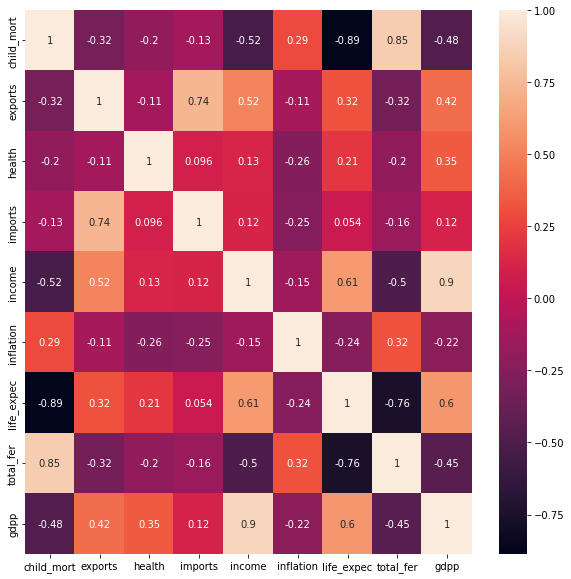

In [9]:
plt.figure(figsize = (10,10))       
sns.heatmap(df.corr(),annot = True)

In [10]:
Y=df['country']
X=df.drop('country',axis =1)


**PCA**

In [11]:
num_list = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']
def scale_features(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)

    X -= mean
    X /= std

    return (X)

In [12]:
scale_features(X)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817
...,...,...,...,...,...,...,...,...,...
162,-0.225578,0.200917,-0.571711,0.240700,-0.738527,-0.489784,-0.852161,0.365754,-0.546913
163,-0.526514,-0.461363,-0.695862,-1.213499,-0.033542,3.616865,0.546361,-0.316678,0.029323
164,-0.372315,1.130305,0.008877,1.380030,-0.658404,0.409732,0.286958,-0.661206,-0.637754
165,0.448417,-0.406478,-0.597272,-0.517472,-0.658924,1.500916,-0.344633,1.140944,-0.637754


In [13]:
X.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817


In [14]:
def PCA(X, n_comp):
  X = X - np.mean(X , axis = 0)
  cov_mat = np.cov(X.T)
  eig_values, eig_vectors = np.linalg.eig(cov_mat)
  eig_vectors = eig_vectors.T
  index = np.argsort(eig_values)[::-1]
  eig_values = eig_values[index]
  eig_vectors = eig_vectors[index]
  comp=eig_vectors[0:n_comp]
  X_transformed=np.dot(X, comp.T)
     
  return X_transformed,eig_values,eig_vectors

In [15]:
X_pca,eig_values,eig_vectors=PCA(X, 4)

In [16]:
eig_vals_total = sum(eig_values)
explained_variance = [(i / eig_vals_total)*100 for i in eig_values]
cum_explained_variance = np.cumsum(explained_variance)

print('Explained variance: {}'.format(explained_variance))
print('Cumulative explained variance: {}'.format(cum_explained_variance))

Explained variance: [45.95173978609592, 17.18162565161821, 13.004258896953068, 11.053161805571904, 7.34021142415604, 2.4842346764277505, 1.2604303981650278, 0.9812817379261455, 0.743055623085951]
Cumulative explained variance: [ 45.95173979  63.13336544  76.13762433  87.19078614  94.53099756
  97.01523224  98.27566264  99.25694438 100.        ]


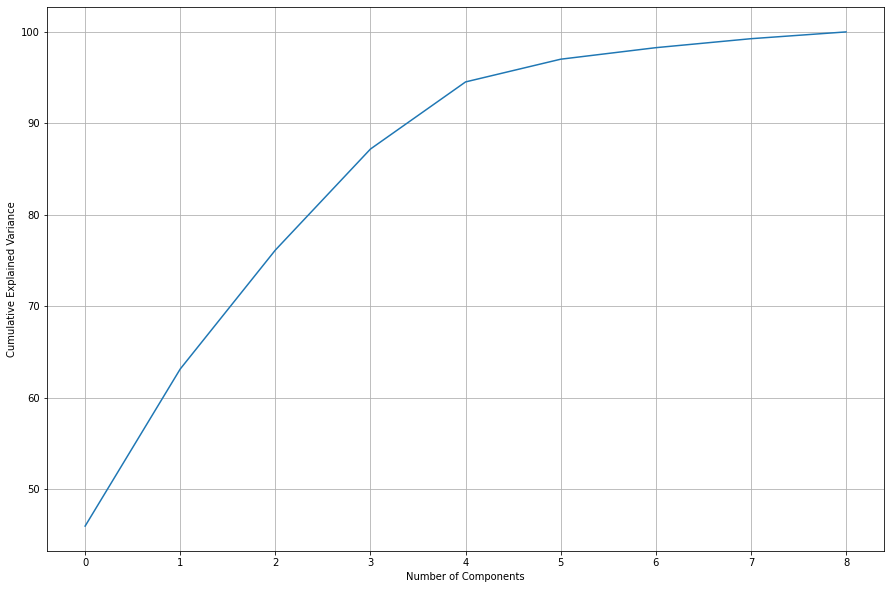

In [17]:
fig = plt.figure(figsize = (15,10))
plt.plot(cum_explained_variance)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()

after pc=4 there is not much gain in variance

hence, pc=4 with 95% variance

In [18]:
X_pca

array([[ 2.91302459e+00, -9.56205755e-02,  7.18118495e-01,
        -1.00525464e+00],
       [-4.29911330e-01,  5.88155666e-01,  3.33485505e-01,
         1.16105859e+00],
       [ 2.85225077e-01,  4.55174413e-01, -1.22150481e+00,
         8.68114503e-01],
       [ 2.93242265e+00, -1.69555507e+00, -1.52504374e+00,
        -8.39625014e-01],
       [-1.03357587e+00, -1.36658709e-01,  2.25720917e-01,
         8.47062687e-01],
       [-2.24072616e-02,  1.77918658e+00, -8.69997116e-01,
         3.69668667e-02],
       [ 1.01583737e-01,  5.68251724e-01, -2.42091816e-01,
         1.46626576e+00],
       [-2.34216461e+00,  1.98845915e+00, -1.90344188e-01,
        -1.10503778e+00],
       [-2.97376366e+00,  7.34688659e-01,  5.19766356e-01,
        -1.20544210e+00],
       [ 1.81486997e-01,  4.02865873e-01, -8.67458743e-01,
         4.38772983e-01],
       [-1.26874386e+00,  6.56588363e-01,  4.88097616e-01,
        -5.56335553e-02],
       [-1.67099640e+00, -5.61162493e-01, -9.91258303e-01,
      

In [19]:
pca_df = pd.DataFrame(X_pca,columns = ['PC1', 'PC2','PC3','PC4'])


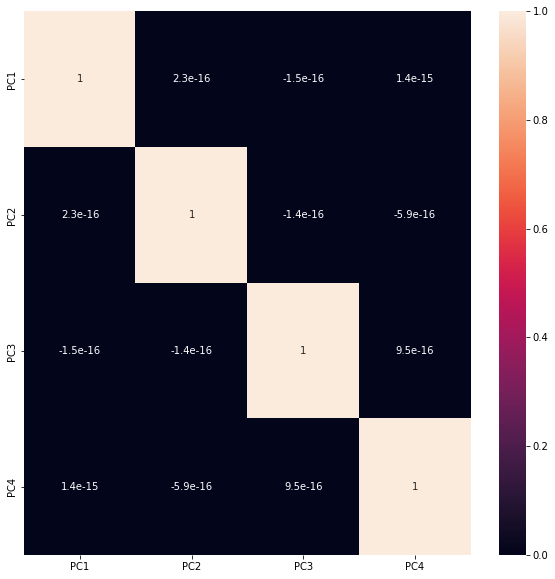

In [20]:
plt.figure(figsize = (10,10))
sns.heatmap(pca_df.corr(),annot = True)
plt.show()

In [21]:
country = pd.DataFrame(Y)
pca_df = pd.concat([country, pca_df], axis=1)
pca_df

,country,PC1,PC2,PC3,PC4
0,Afghanistan,2.913025,-0.095621,0.718118,-1.005255
1,Albania,-0.429911,0.588156,0.333486,1.161059
2,Algeria,0.285225,0.455174,-1.221505,0.868115
3,Angola,2.932423,-1.695555,-1.525044,-0.839625
4,Antigua and Barbuda,-1.033576,-0.136659,0.225721,0.847063
...,...,...,...,...,...
162,Vanuatu,0.820631,-0.639570,0.389923,0.706595
163,Venezuela,0.551036,1.233886,-3.101350,0.115311
164,Vietnam,-0.498524,-1.390744,0.238526,1.074098
165,Yemen,1.887451,0.109453,-1.109752,-0.056257


**Outliers**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

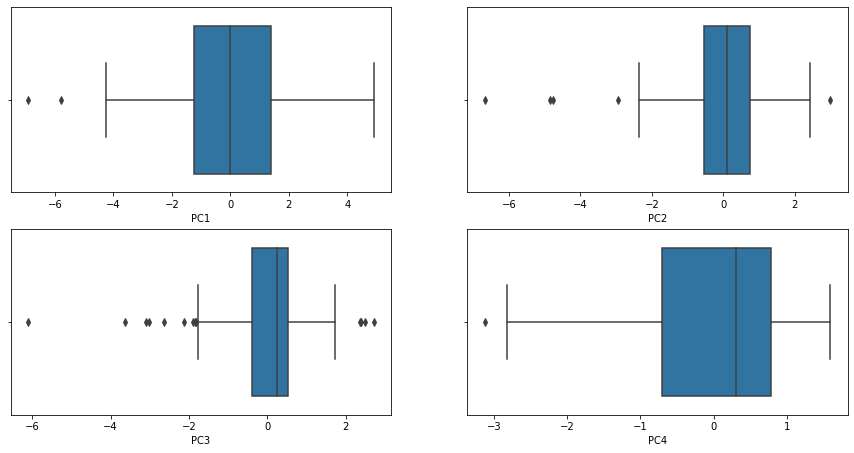

In [22]:
fig, axs = plt.subplots(2,2, figsize = (15,7.5))

plt1 = sns.boxplot(pca_df['PC1'], ax = axs[0,0])
plt2 = sns.boxplot(pca_df['PC2'], ax = axs[0,1])
plt3 = sns.boxplot(pca_df['PC3'], ax = axs[1,0])
plt4 = sns.boxplot(pca_df['PC4'], ax = axs[1,1])

**K Means**

Elbow method and Silhouette score

In [23]:
import random

In [24]:
from sklearn.cluster import KMeans

wcss = []
for num_clusters in list(range(1,11)):
    model = KMeans(n_clusters = num_clusters, max_iter=50)
    model.fit(X_pca)
    wcss.append(model.inertia_)

Text(0, 0.5, 'WCSS')

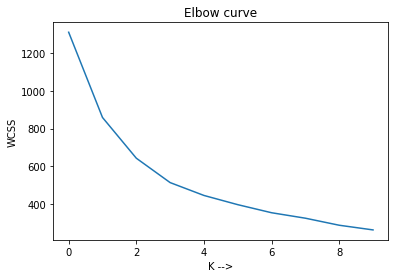

In [25]:
x = np.arange(10)
plt.plot(x,wcss)
plt.title("Elbow curve")
plt.xlabel("K -->")
plt.ylabel("WCSS")

In [26]:
from sklearn.metrics import silhouette_score


for k in range(2,11):
    
  
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_pca)
    
    sil_score = silhouette_score(X_pca, kmeans.labels_)
    print("For clusters={0}, silhouette score = {1}".format(k, sil_score))

For clusters=2, silhouette score = 0.32232389389280924
For clusters=3, silhouette score = 0.3340859524580048
For clusters=4, silhouette score = 0.35192526767255156
For clusters=5, silhouette score = 0.28511618045640774
For clusters=6, silhouette score = 0.29616252599551957
For clusters=7, silhouette score = 0.29636110604296734
For clusters=8, silhouette score = 0.28965353477396105
For clusters=9, silhouette score = 0.27466948755755183
For clusters=10, silhouette score = 0.2579194302099198


K-Means

In [27]:
def euc_distance(X1, X2):
    return(sum((X1 - X2)**2))**0.5

In [28]:
def find_clusters(X,in_c):
    assigned_centroid = []
    for i in X:
        distance=[]
        for j in in_c:
            distance.append(euc_distance(i, j))
        assigned_centroid.append(np.argmin(distance))
    return assigned_centroid

In [29]:
def calc_centroids(X,clusters):
    new_centroids = []
    new_df = pd.concat([pd.DataFrame(X), pd.DataFrame(clusters, columns=['cluster'])],
                      axis=1)
    for c in set(new_df['cluster']):
        current_cluster = new_df[new_df['cluster'] == c][new_df.columns[:-1]]
        cluster_mean = current_cluster.mean(axis=0)
        new_centroids.append(cluster_mean)
    return new_centroids

In [30]:
cent_pos = random.sample(range(0, len(X)), 4)

In [31]:
initial_centroids = []
for i in cent_pos:
    initial_centroids.append(X_pca[i])

In [32]:
in_c = np.array(initial_centroids)
in_c

array([[ 2.58170623, -1.20787342,  0.23306616, -0.66529336],
       [-0.5727927 ,  0.63738484, -0.08635076,  1.0298393 ],
       [ 0.8481867 ,  0.8198189 , -0.58328975,  0.74523092],
       [-0.90659452, -0.03027761,  0.47120404,  0.9946614 ]])

In [33]:
clusters = find_clusters(X_pca,initial_centroids)
clusters

[0,
 1,
 2,
 0,
 3,
 2,
 1,
 1,
 3,
 2,
 3,
 3,
 2,
 3,
 3,
 3,
 3,
 0,
 3,
 2,
 3,
 0,
 1,
 1,
 3,
 0,
 0,
 3,
 0,
 1,
 3,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 3,
 3,
 3,
 2,
 1,
 2,
 1,
 0,
 2,
 3,
 3,
 3,
 1,
 2,
 0,
 3,
 3,
 0,
 1,
 1,
 2,
 0,
 0,
 3,
 0,
 3,
 3,
 2,
 2,
 2,
 2,
 3,
 1,
 1,
 1,
 1,
 3,
 2,
 2,
 0,
 1,
 3,
 2,
 3,
 3,
 0,
 0,
 1,
 3,
 3,
 3,
 0,
 0,
 3,
 3,
 0,
 3,
 0,
 3,
 3,
 3,
 2,
 3,
 1,
 0,
 2,
 0,
 2,
 3,
 1,
 0,
 0,
 1,
 1,
 2,
 3,
 3,
 1,
 2,
 1,
 3,
 1,
 1,
 2,
 2,
 2,
 1,
 0,
 3,
 3,
 0,
 3,
 3,
 3,
 0,
 2,
 3,
 1,
 2,
 1,
 2,
 1,
 3,
 3,
 2,
 0,
 3,
 2,
 0,
 2,
 3,
 1,
 3,
 0,
 1,
 3,
 1,
 1,
 1,
 2,
 2,
 2,
 3,
 2,
 0]

In [34]:
centroids = initial_centroids
for i in range(20):
    cluster = find_clusters( X_pca,centroids)
    centroids = calc_centroids(X_pca,cluster)

In [35]:
cluster

[0,
 2,
 2,
 0,
 2,
 2,
 2,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 0,
 2,
 2,
 2,
 0,
 2,
 1,
 2,
 0,
 0,
 2,
 0,
 1,
 2,
 0,
 0,
 2,
 2,
 2,
 0,
 0,
 0,
 2,
 0,
 2,
 1,
 2,
 1,
 2,
 2,
 2,
 2,
 0,
 0,
 2,
 2,
 1,
 1,
 0,
 0,
 2,
 1,
 0,
 1,
 2,
 2,
 0,
 0,
 2,
 0,
 2,
 1,
 2,
 2,
 2,
 0,
 1,
 1,
 1,
 2,
 1,
 2,
 2,
 0,
 0,
 1,
 2,
 0,
 2,
 2,
 0,
 0,
 2,
 2,
 3,
 2,
 0,
 0,
 2,
 2,
 0,
 3,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 2,
 0,
 2,
 1,
 1,
 0,
 0,
 1,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 2,
 2,
 0,
 2,
 2,
 0,
 2,
 2,
 0,
 3,
 2,
 1,
 0,
 0,
 1,
 1,
 2,
 2,
 0,
 2,
 1,
 1,
 2,
 0,
 2,
 0,
 0,
 2,
 2,
 2,
 2,
 0,
 2,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 0,
 0]

In [36]:
ClusterID  = pd.DataFrame(cluster)
df_pca_km = pd.concat([pca_df,ClusterID], axis=1)
df_pca_km.columns=['Country','PC1', 'PC2', 'PC3', 'PC4', 'ClusterID']
df_pca_km

,Country,PC1,PC2,PC3,PC4,ClusterID
0,Afghanistan,2.913025,-0.095621,0.718118,-1.005255,0
1,Albania,-0.429911,0.588156,0.333486,1.161059,2
2,Algeria,0.285225,0.455174,-1.221505,0.868115,2
3,Angola,2.932423,-1.695555,-1.525044,-0.839625,0
4,Antigua and Barbuda,-1.033576,-0.136659,0.225721,0.847063,2
...,...,...,...,...,...,...
162,Vanuatu,0.820631,-0.639570,0.389923,0.706595,2
163,Venezuela,0.551036,1.233886,-3.101350,0.115311,2
164,Vietnam,-0.498524,-1.390744,0.238526,1.074098,2
165,Yemen,1.887451,0.109453,-1.109752,-0.056257,0


In [37]:
for k in range(0,4):
  k_Means_countries = df[df_pca_km['ClusterID'] == k]
  print("For Cluster=",k,k_Means_countries.country.unique())

For Cluster= 0 ['Afghanistan' 'Angola' 'Benin' 'Botswana' 'Burkina Faso' 'Burundi'
 'Cameroon' 'Central African Republic' 'Chad' 'Comoros' 'Congo, Dem. Rep.'
 'Congo, Rep.' "Cote d'Ivoire" 'Equatorial Guinea' 'Eritrea' 'Gabon'
 'Gambia' 'Ghana' 'Guinea' 'Guinea-Bissau' 'Haiti' 'Iraq' 'Kenya'
 'Kiribati' 'Lao' 'Lesotho' 'Liberia' 'Madagascar' 'Malawi' 'Mali'
 'Mauritania' 'Mozambique' 'Namibia' 'Niger' 'Nigeria' 'Pakistan' 'Rwanda'
 'Senegal' 'Sierra Leone' 'Solomon Islands' 'South Africa' 'Sudan'
 'Tanzania' 'Timor-Leste' 'Togo' 'Uganda' 'Yemen' 'Zambia']
For Cluster= 1 ['Australia' 'Austria' 'Belgium' 'Brunei' 'Canada' 'Cyprus' 'Denmark'
 'Finland' 'France' 'Germany' 'Greece' 'Iceland' 'Ireland' 'Israel'
 'Italy' 'Japan' 'Kuwait' 'Netherlands' 'New Zealand' 'Norway' 'Portugal'
 'Qatar' 'Slovenia' 'South Korea' 'Spain' 'Sweden' 'Switzerland'
 'United Arab Emirates' 'United Kingdom' 'United States']
For Cluster= 2 ['Albania' 'Algeria' 'Antigua and Barbuda' 'Argentina' 'Armenia'
 'Azerba

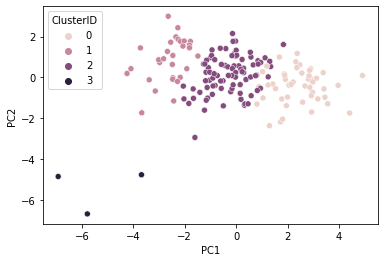

In [38]:
sns.scatterplot(x='PC1',y='PC2',data=df_pca_km,hue='ClusterID')

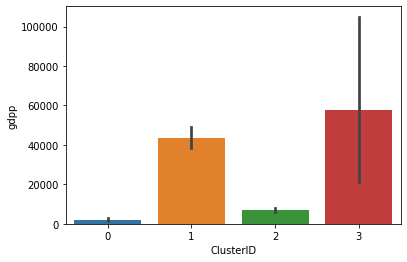

In [39]:
sns.barplot(x=df_pca_km.ClusterID, y=df['gdpp'])
plt.show()

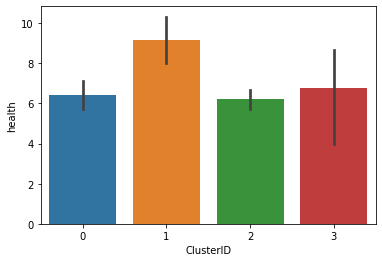

In [40]:
sns.barplot(x=df_pca_km.ClusterID, y=df['health'])
plt.show()

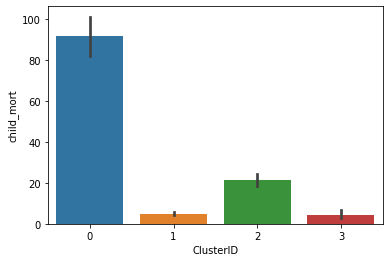

In [41]:
sns.barplot(x=df_pca_km.ClusterID, y=df['child_mort'])
plt.show()

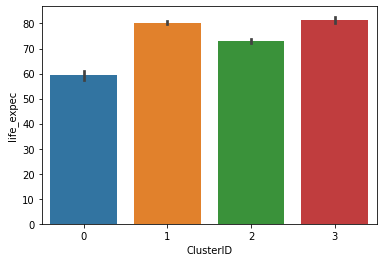

In [42]:
sns.barplot(x=df_pca_km.ClusterID, y=df['life_expec'])
plt.show()

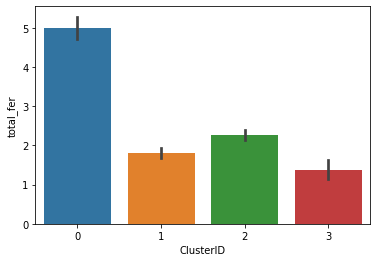

In [43]:
sns.barplot(x=df_pca_km.ClusterID, y=df['total_fer'])
plt.show()

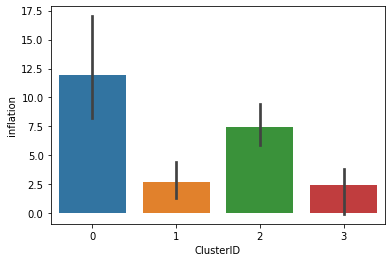

In [44]:
sns.barplot(x=df_pca_km.ClusterID, y=df['inflation'])
plt.show()

Cluster 0 :- Low Income Countries

Cluster 1 :- High Income Countries



Cluster 2 :- Medium Income Countries

Cluster 3 :- Very High Income Countries